In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import umap
from matplotlib import cm

In [2]:
# Y label will be varient coloring
wuhan_path = '../wuhan_generalization_experements/embeddings/wuhan_adj_mat_encoding.npy'
alpha_path = '../wuhan_generalization_experements/embeddings/alpha_adj_mat_encoding.npy'
beta_path = '../wuhan_generalization_experements/embeddings/beta_adj_mat_encoding.npy'
delta_path = '../wuhan_generalization_experements/embeddings/delta_adj_mat_encoding.npy'
eta_path = '../wuhan_generalization_experements/embeddings/eta_adj_mat_encoding.npy'
omicron_path = '../wuhan_generalization_experements/embeddings/omicron_ba1_adj_mat_encoding.npy'
omicron2_path = '../wuhan_generalization_experements/embeddings/omicron_ba2_adj_mat_encoding.npy'

# todo add omicron ba2!

def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    X = dataset[:,:-2]
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)
alpha = unpack(alpha_path,1)
beta = unpack(beta_path,2)
delta = unpack(delta_path,3)
eta = unpack(eta_path,4)
omicron = unpack(omicron_path,5)
omicron2 = unpack(omicron2_path,6)

X = np.vstack((wuhan,alpha,beta,delta,eta,omicron,omicron2))
coloring = X[:,-1]
X = X[:,:-1]

In [3]:
reducer = umap.UMAP()
Y = reducer.fit_transform(X)

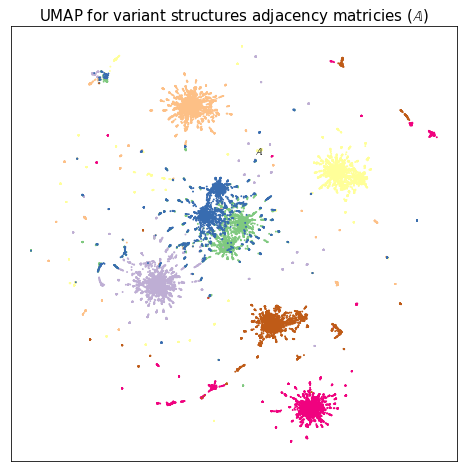

In [9]:
fig = plt.figure(figsize=(8,8))
colors = cm.get_cmap('Accent')

col_vec = []
for i in coloring:
    col = colors(int(i))
    col_vec.append(col)

scatter = plt.scatter(Y[:,0], Y[:,1], c=np.array(col_vec), s = 0.8)
plt.title("UMAP for variant structures adjacency matricies ($\mathbb{A}$)",fontsize=15)

plt.xticks([])
plt.yticks([])

fig.savefig("../reasults_figs/UMAP_all_structs.png",facecolor='white', transparent=False,bbox_inches='tight')

In [19]:
# Now for one hot encoding..
wuhan_path = '../wuhan_generalization_experements/embeddings/wuhan_one_hot_encoding.npy'
alpha_path = '../wuhan_generalization_experements/embeddings/alpha_one_hot_encoding.npy'
beta_path = '../wuhan_generalization_experements/embeddings/beta_one_hot_encoding.npy'
delta_path = '../wuhan_generalization_experements/embeddings/delta_one_hot_encoding.npy'
eta_path = '../wuhan_generalization_experements/embeddings/eta_one_hot_encoding.npy'
omicron_path = '../wuhan_generalization_experements/embeddings/omicron_ba1_one_hot_encoding.npy'
omicron2_path = '../wuhan_generalization_experements/embeddings/omicron_ba2_one_hot_encoding.npy'


def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    X = dataset[:,:-2]
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)
alpha = unpack(alpha_path,1)
beta = unpack(beta_path,2)
delta = unpack(delta_path,3)
eta = unpack(eta_path,4)
omicron = unpack(omicron_path,5)
omicron2 = unpack(omicron2_path,6)

X = np.vstack((wuhan,alpha,beta,delta,eta,omicron,omicron2))
coloring = X[:,-1]
X = X[:,:-1]

reducer = umap.UMAP()
Y = reducer.fit_transform(X)


<Figure size 576x576 with 0 Axes>

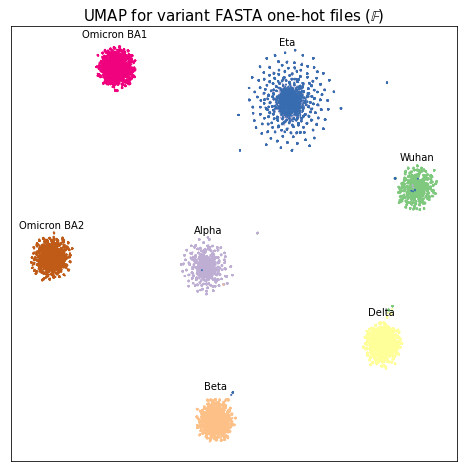

In [49]:
fig = plt.figure(figsize=(8,8))

fig = plt.figure(figsize=(8,8))
colors = cm.get_cmap('Accent')
col_vec = []
for i in coloring:
    col = colors(int(i))
    col_vec.append(col)


scatter = plt.scatter(Y[:,0], Y[:,1], c = col_vec, s = 0.8)
plt.title("UMAP for variant FASTA one-hot files ($\mathbb{F}$)",fontsize=15)

plt.xticks([])
plt.yticks([])


plt.text(20, 8.5, 'Wuhan', ha='center', va='center', color='black')
plt.text(5.5, 4, 'Alpha', ha='center', va='center', color='black')
plt.text(6, -5.5, 'Beta', ha='center', va='center', color='black')
plt.text(17.5, -1, 'Delta', ha='center', va='center', color='black')
plt.text(11, 15.5, 'Eta', ha='center', va='center', color='black')
plt.text(-1, 16, 'Omicron BA1', ha='center', va='center', color='black')
plt.text(-5.4, 4.3, 'Omicron BA2', ha='center', va='center', color='black')

# Plot varient names onto fig..
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...
fig.savefig("../reasults_figs/UMAP_FASTA.png",facecolor='white', transparent=False,bbox_inches='tight')